# Truncation Nation - Hack4Change

## Reading cleaned data

In [212]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Air Traffic Data
air_traffic = pd.read_csv('./data/cleaned/irish_flights.csv', parse_dates = True)

# Covid Cases Data
covid_cases = pd.read_csv('./data/cleaned/covid_stats.csv', parse_dates = True)

# County Data
counties = {
    "Dublin": pd.read_csv('./data/cleaned/county_data/dublin.csv', parse_dates = True),
    "Mayo": pd.read_csv('./data/cleaned/county_data/mayo.csv', parse_dates = True),
    "Limerick": pd.read_csv('./data/cleaned/county_data/limerick.csv', parse_dates = True),
    "Clare": pd.read_csv('./data/cleaned/county_data/clare.csv', parse_dates = True),
    "Leitrim": pd.read_csv('./data/cleaned/county_data/leitrim.csv', parse_dates = True),
    "Tipperary": pd.read_csv('./data/cleaned/county_data/tipp.csv', parse_dates = True)
}


## Overview of Findings

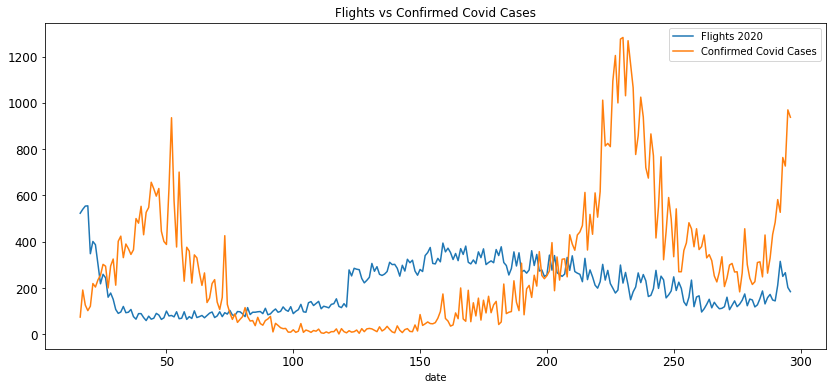

In [213]:
# Formatting Air Traffic Data
air_traffic2 = air_traffic.drop([0,1], axis = 0)
air_traffic2.rename(columns = {'Day 2020':'Date'}, inplace = True)
air_traffic2.set_index("Date", inplace = True)

# Formatting Covid Data
covid_cases2 = covid_cases.drop([0], axis = 0)
covid_cases2.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)

# Plotting Flights vs Covid Cases
p = df['Flights 2020'].plot(title = 'Flights vs Confirmed Covid Cases',figsize = (14, 6), fontsize = 12)
df['ConfirmedCovidCases'].plot()
plt.legend(['Flights 2020','Confirmed Covid Cases'])
p.set_xlabel('date')
p.set_ylabel('');

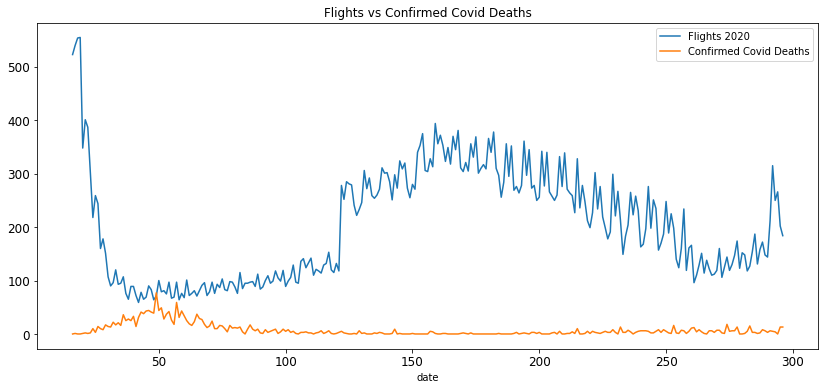

In [214]:
# Plotting Flights vs Confirmed Deaths
p = df['Flights 2020'].plot(title = 'Flights vs Confirmed Covid Deaths',figsize = (14, 6), fontsize = 12)
df['ConfirmedCovidDeaths'].plot()
p.set_xlabel('date')
plt.legend(['Flights 2020','Confirmed Covid Deaths'])
p.set_ylabel('');

## Flight & Covid Correlation

In [215]:
df = pd.merge(air_traffic, covid_cases, left_index=True, right_index=True)
df.dropna(inplace=True)
plt.rcParams['figure.figsize'] = (20, 10)

def scatter_line(independent, colours, markers, labels, x_label, y_label, title, *dependents):
    #for each dependent variable
    for i in range(len(dependents)):
        #create scatter plots for each dependent variable versus the independent variable
        plt.scatter(independent, dependents[i], color = colours[i], marker = markers[i], label = labels[i])
        #create the lines of best fit using the equation of a line (y = mx + c) by finding the slope and the y-intercept using
        #the numpy.polyfit() function
        m, c = np.polyfit(independent, dependents[i], 1)
        #plot the lines of best fit
        plt.plot(independent, m*independent + c, color = colours[i])
    
    #label the x and y axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend()
    plt.title(title)
    plt.show()
    
    #display the correlation coefficients
    for i in range(len(dependents)):
        print(f'The correlation coefficient between the {x_label} and the {labels[i]} is {independent.corr(dependents[i])}')

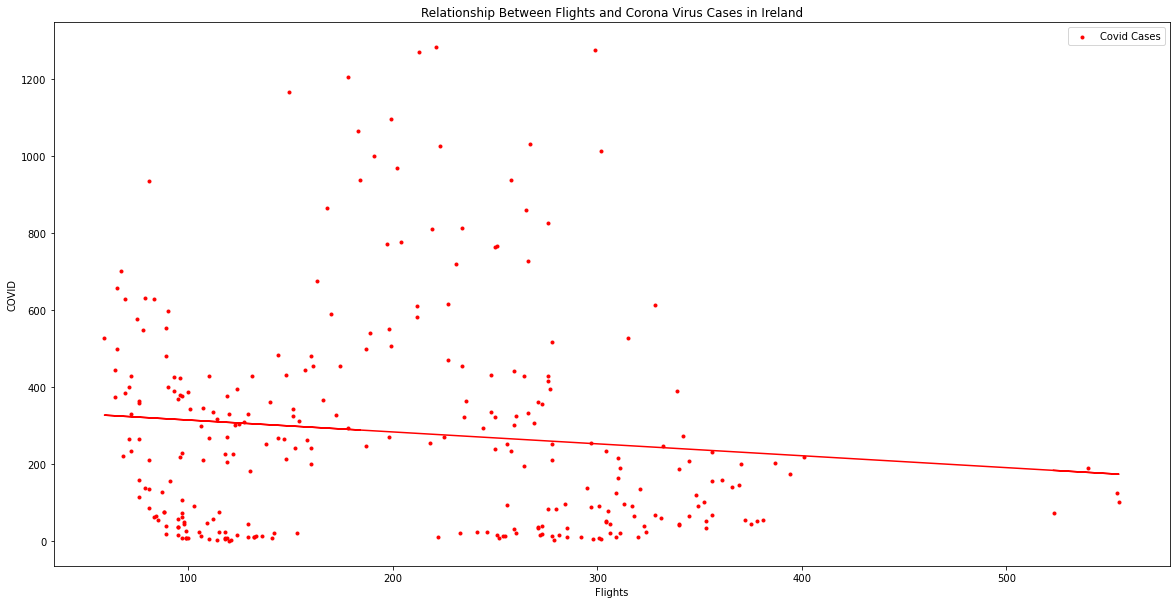

The correlation coefficient between the Flights and the Covid Cases is -0.11324007428190189


In [216]:
# Flights & Covid Cases
colours = ['red']
markers = ['.']
labels = ['Covid Cases']
scatter_line(df['Flights 2020'], colours, markers, labels, 'Flights', 'COVID', 'Relationship Between Flights and Corona Virus Cases in Ireland',
            df['ConfirmedCovidCases'])

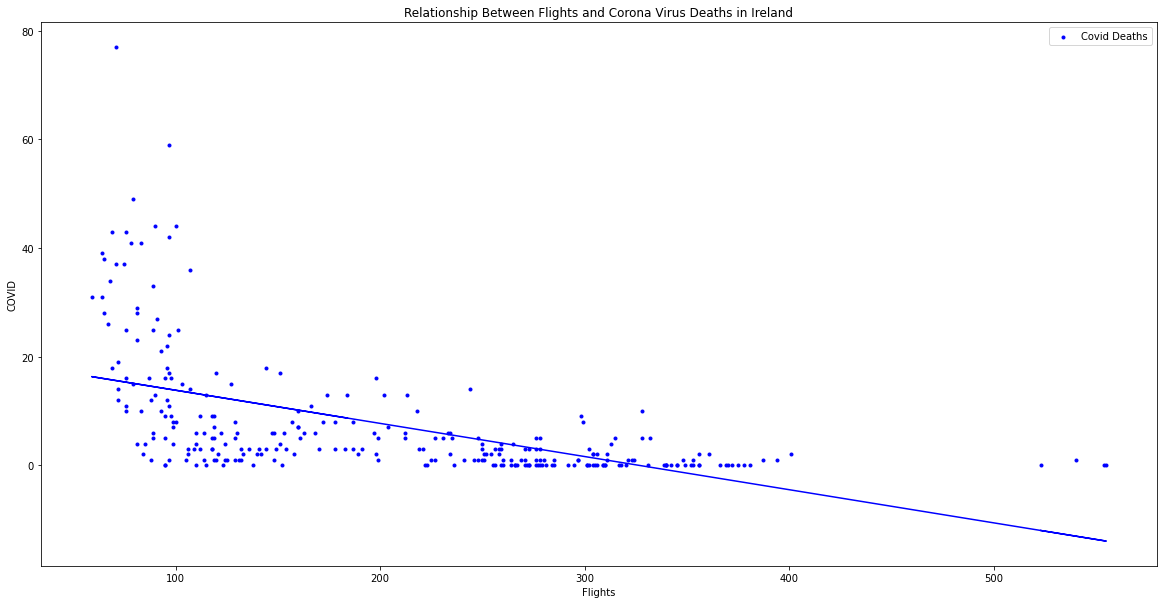

The correlation coefficient between the Flights and the Covid Deaths is -0.5487391450127074


In [217]:
# Flights & Covid Death
colours = ['blue']
markers = ['.']
labels = ['Covid Deaths']
scatter_line(df['Flights 2020'], colours, markers, labels, 'Flights', 'COVID', 'Relationship Between Flights and Corona Virus Deaths in Ireland',
            df['ConfirmedCovidDeaths'])

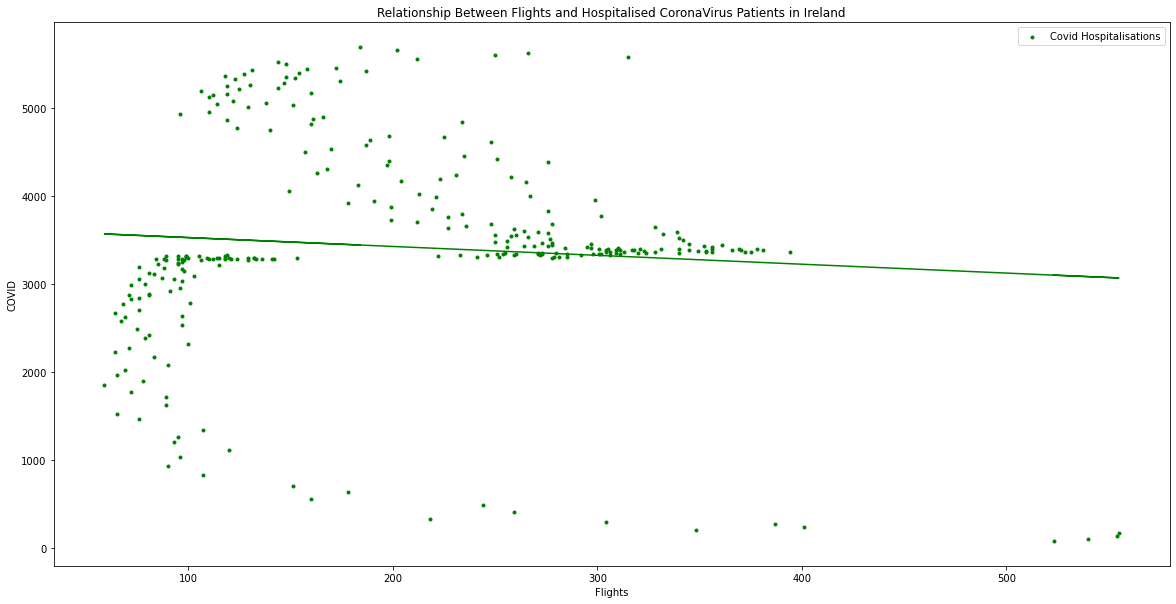

The correlation coefficient between the Flights and the Covid Hospitalisations is -0.08929125800479687


In [218]:
# Flights & Hospitalisations
colours = ['green']
markers = ['.']
labels = ['Covid Hospitalisations']
scatter_line(df['Flights 2020'], colours, markers, labels, 'Flights', 'COVID', 'Relationship Between Flights and Hospitalised CoronaVirus Patients in Ireland',
            df['HospitalisedCovidCases'])

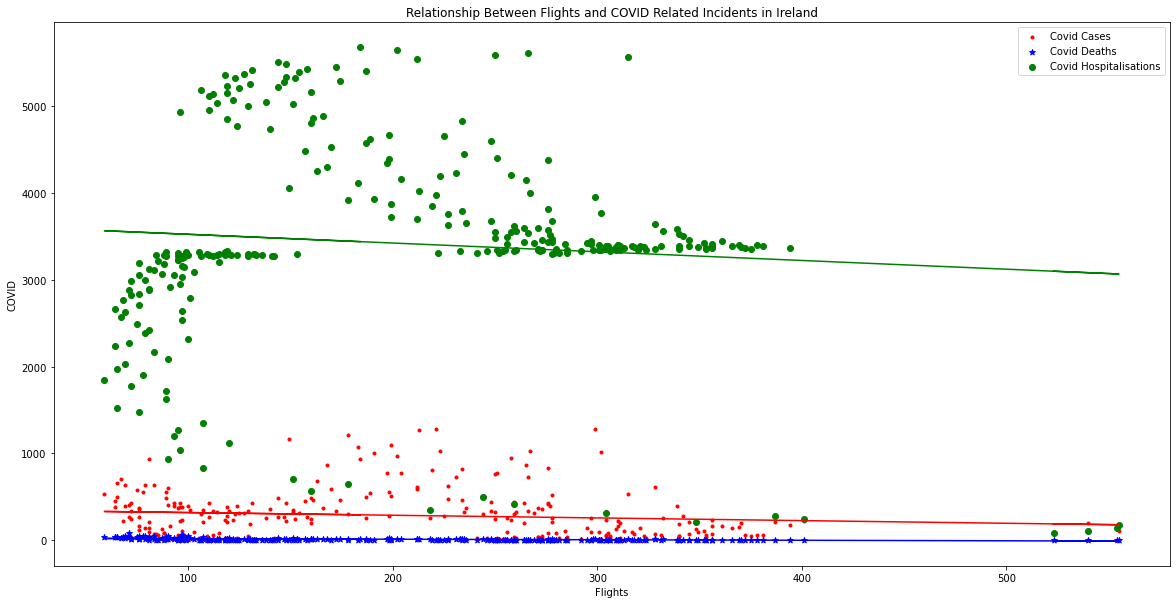

The correlation coefficient between the Flights and the Covid Cases is -0.11324007428190189
The correlation coefficient between the Flights and the Covid Deaths is -0.5487391450127074
The correlation coefficient between the Flights and the Covid Hospitalisations is -0.08929125800479687


In [219]:
# Correlation between flights, cases, deaths and hospitalisations
colours = ['red', 'blue', 'green']
markers = ['.', '*', 'o']
labels = ['Covid Cases', 'Covid Deaths', 'Covid Hospitalisations']
scatter_line(df['Flights 2020'], colours, markers, labels, 'Flights', 'COVID', 'Relationship Between Flights and COVID Related Incidents in Ireland',
            df['ConfirmedCovidCases'], df['ConfirmedCovidDeaths'], df['HospitalisedCovidCases'])

Looking at the scatter plots, it appears as though the air traffic and COVID related incidents in Ireland have almost no relationship. Although there is a weak moderate relationship between the number of deaths and the air traffic with a correlation of approximately -0.6, the other relationships show almost no correlation. Which suggests that the air traffic does not have an effect on the COVID related incidents in this country.

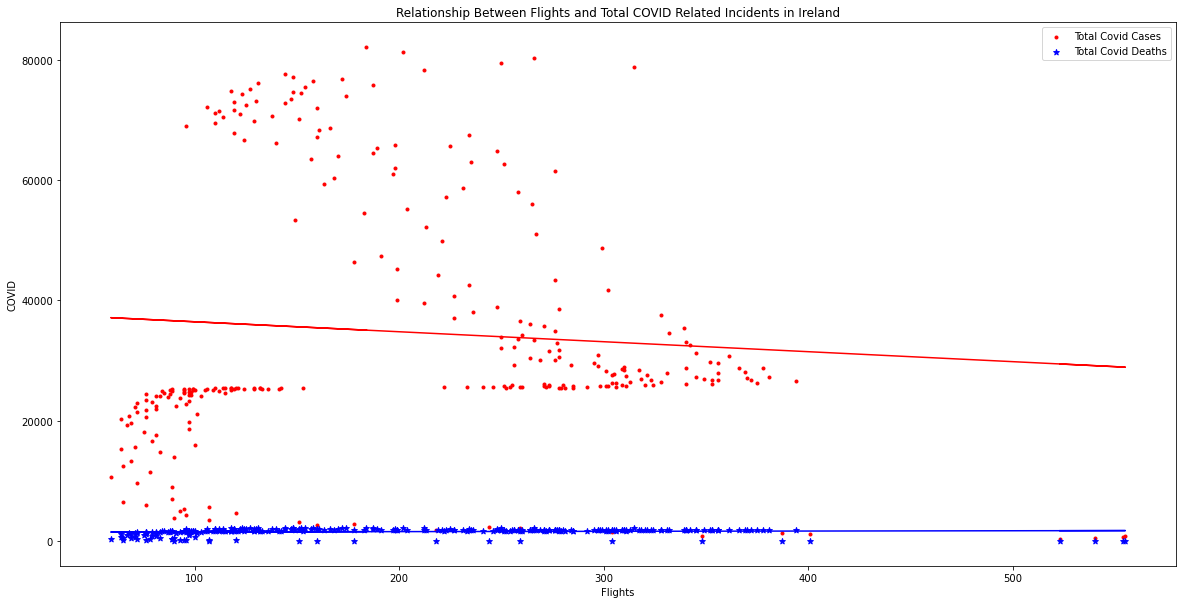

The correlation coefficient between the Flights and the Total Covid Cases is -0.08171895584588589
The correlation coefficient between the Flights and the Total Covid Deaths is 0.08892419274905297


In [220]:
# Relationship of flight & total covid incidents
colours = ['red', 'blue']
markers = ['.', '*']
labels = ['Total Covid Cases', 'Total Covid Deaths']
scatter_line(df['Flights 2020'], colours, markers, labels, 'Flights', 'COVID', 'Relationship Between Flights and Total COVID Related Incidents in Ireland',
            df['TotalConfirmedCovidCases'], df['TotalCovidDeaths'])

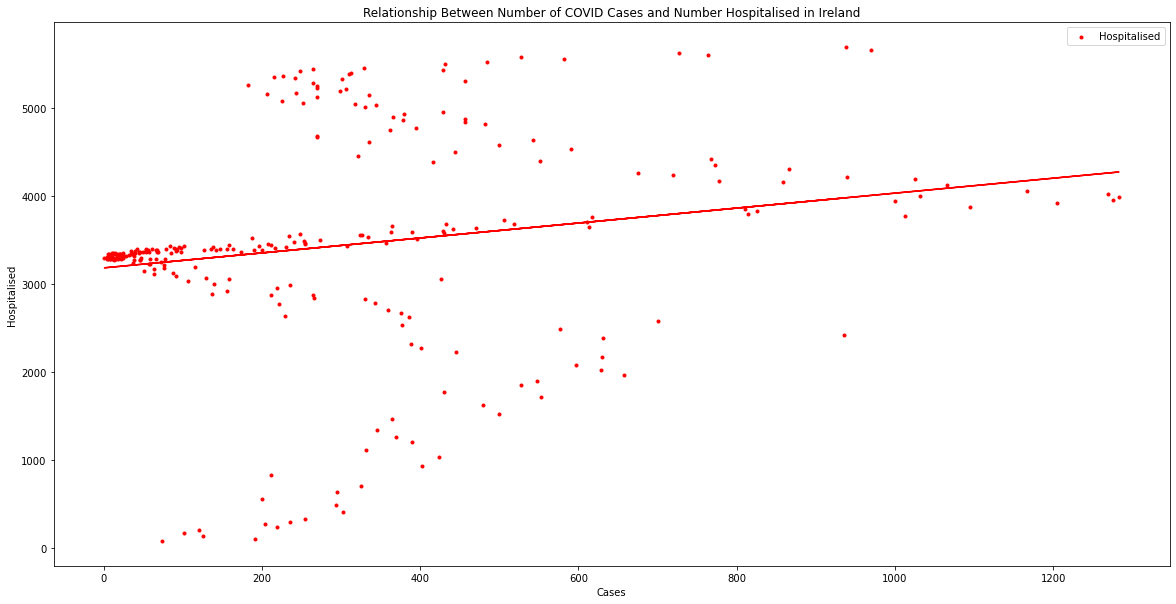

The correlation coefficient between the Cases and the Hospitalised is 0.2049635499126204


In [221]:
# Cases & Hospitalised
colours = ['red']
markers = ['.']
labels = ['Hospitalised']
scatter_line(df['ConfirmedCovidCases'], colours, markers, labels, 'Cases', 'Hospitalised', 'Relationship Between Number of COVID Cases and Number Hospitalised in Ireland',
            df['HospitalisedCovidCases'])

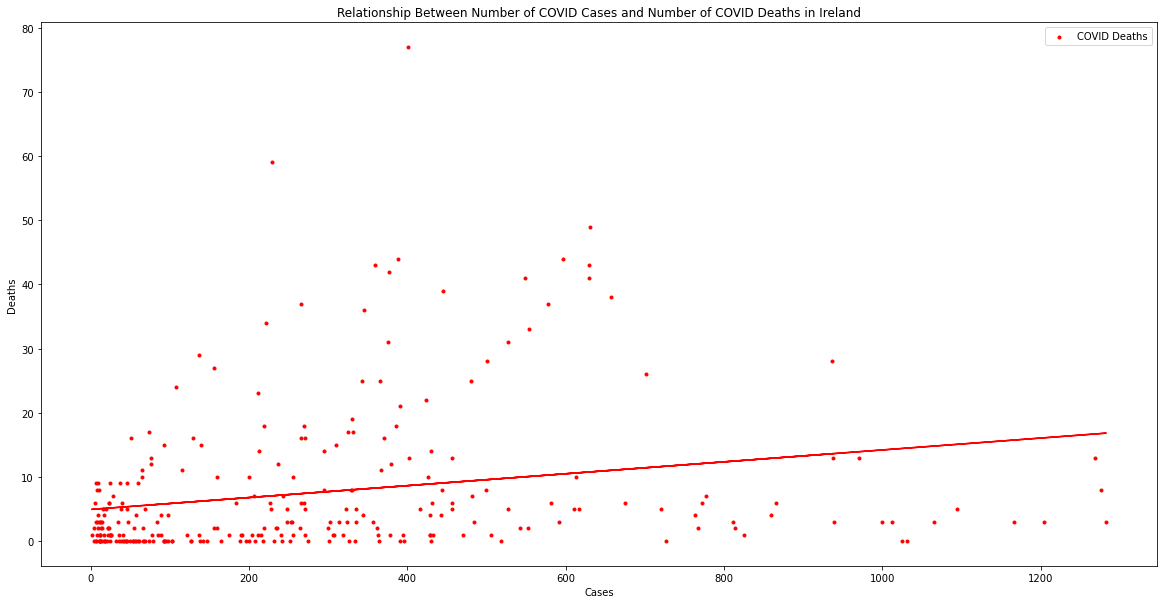

The correlation coefficient between the Cases and the COVID Deaths is 0.22719141919535885


In [222]:
# Cases & Deaths
colours = ['red']
markers = ['.']
labels = ['COVID Deaths']
scatter_line(df['ConfirmedCovidCases'], colours, markers, labels, 'Cases', 'Deaths', 'Relationship Between Number of COVID Cases and Number of COVID Deaths in Ireland',
            df['ConfirmedCovidDeaths'])

The scatter plot shows a weak relationship between COVID cases and deaths in this country with a correlation of approximately 0.23, which suggests that the virus in this country has a low mortality rate

## Counties With Airports

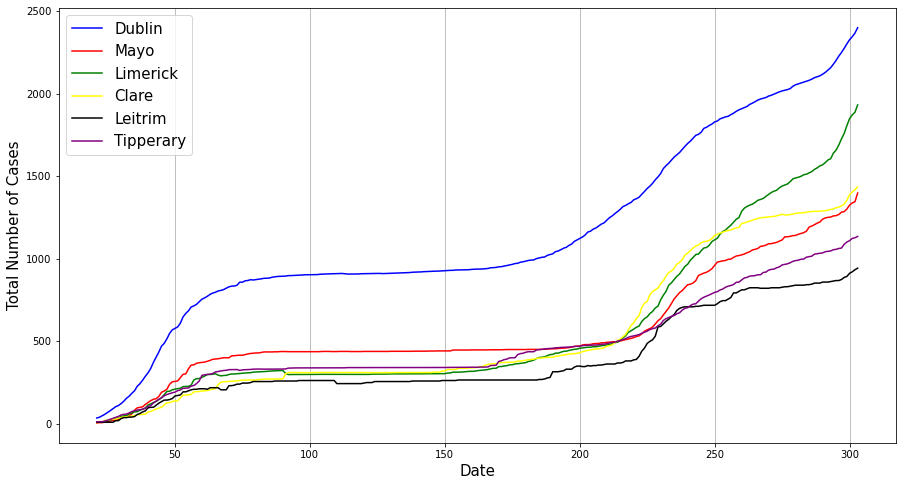

In [223]:
# Graph data, set country to respective colour
graph = counties['Dublin']['PopulationProportionCovidCases'].plot(color='blue', figsize=(15,8), label='Dublin')
graph = counties['Mayo']['PopulationProportionCovidCases'].plot(color='red', figsize=(15,8), label='Mayo')
graph = counties['Limerick']['PopulationProportionCovidCases'].plot(color='green', figsize=(15,8), label='Limerick')
graph = counties['Clare']['PopulationProportionCovidCases'].plot(color='yellow', figsize=(15,8), label='Clare')
graph = counties['Leitrim']['PopulationProportionCovidCases'].plot(color='black', figsize=(15,8), label='Leitrim')
graph = counties['Tipperary']['PopulationProportionCovidCases'].plot(color='purple', figsize=(15,8), label='Tipperary')

# Setting graph styling
graph.set_xlabel("Date", fontsize=15)
graph.set_ylabel("Total Number of Cases", fontsize=15)
graph.legend(fontsize=15)
graph.xaxis.grid()

There is no clear difference in counties that have an international airports and between those that don't. This would suggest that the airports in these counties don't play a role in the overall Covid cases found in the county.